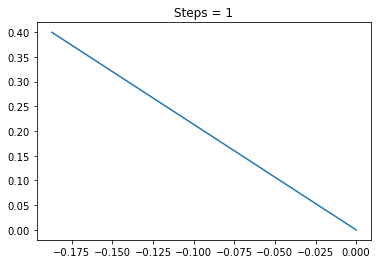

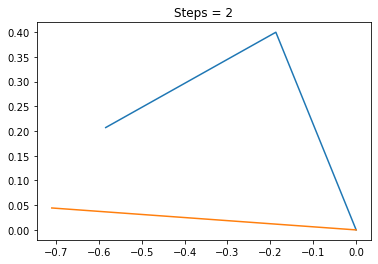

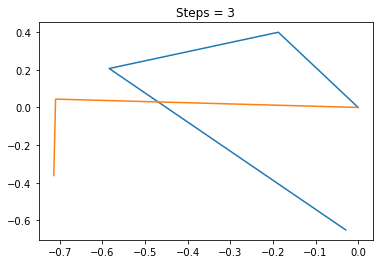

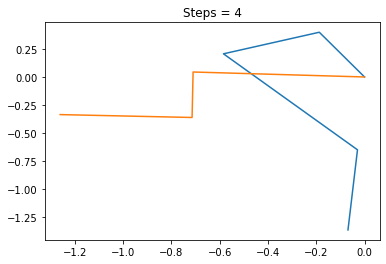

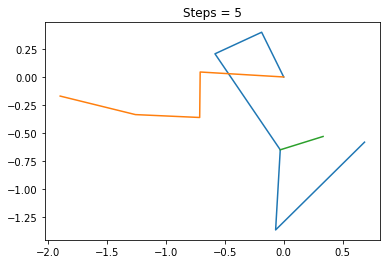

In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from collections import OrderedDict
import more_itertools as mit

N = 6 # number of steps
bp = 0.15
off = 1

# From stack exchange, create function which can calculate the angle between line and x-axis
# & funciton which compares angles btw radians
# & fnc which finds intersecting range - modified for sets

def angle_trunc(a):
    while a < 0.0:
        a += pi * 2
    while a > 2 * pi:
        a -= pi * 2
    return a

def AngleBtwPt(x_orig, y_orig, x_landmark, y_landmark):
    deltaY = y_landmark - y_orig
    deltaX = x_landmark - x_orig
    return angle_trunc(math.atan2(deltaY, deltaX))

def get_intersect(r1, r2):
        left = max(r1[0], r2[0])
        right = min(r1[1], r2[1])
        if left>right:
            return None
        return (left,right)
    
def countX(lst, x):
    return lst.count(x)

def find_ranges(iterable):
    for group in mit.consecutive_groups(iterable):
        group = list(group)
        if len(group) == 1:
            yield [group[0]]
        else:
            yield group[0], group[-1]

# walker 1
w1 = [[0,0]]

# creating list of walkers
a = [w1]

# angle list, alpha list, intersection list (one for each walker)
angles = []
#theta = []
alphas = []
numlines = []
ans = []

for iN in range(1,N):
    
    # removes "memory" of previous step
    angles.clear()
    alphas.clear()
    numlines.clear()
    ans.clear()
    
    plt.title("Random Walk ($n = " + str(iN) + "$ steps)")

    b0 = len(a)
    for j in range(b0): # Anya's part
        
        # find the change in position
        dp = [2*np.random.random()-1, 2*np.random.random()-1]

        # add new position to walker path
        a[j].append([sum(z) for z in zip(a[j][-1],dp)])    

        # branch with probability bp at specified offset, if possible
        if (np.random.random() < bp) & (off < len(a[j])):
            a.append([a[j][-(1+off)].copy()])
         
        # initialize lists of data structures to have the right number of (empty) eleemntes
        angles.append([])
        numlines.append({})
        alphas.append([])
        ans.append([]) # right?        
    
    # go thru all branches   
    for ik in range(b0): # ik = i check # for other avoidance # angles are being recalculated, so I might be able to decrease run time if I figure out how
        # compare each branch a[ik] to all other branches
        for it1 in range(b0): # calculate angles and find the max and min for w1
            # go thru all the points in branch a[it1]
            for it11 in range(len(a[it1])):
                
                #compare the tip of branch a[ik] to all poitns in branch a[it1]
                theta = AngleBtwPt(a[ik][-1][0],a[ik][-1][1],a[it1][it11][0],a[it1][it11][1])
                
                # add valid angles to angles
                if theta != 0:
                    angles[ik].append(theta)
            
        angles[ik] = list(OrderedDict.fromkeys(angles[ik]))

        n1 = [val for val in angles[ik] for x in (0, 1)]
        n1.append(2*np.pi)
        n1.append(0)
        
        n1 = sort(n1)

        n1 = [n1[i:i + 2] for i in range(0, len(n1), 2)]
        
        for val1 in range(len(n1)):
            numlines[ik][val1] = n1[val1]
            
        for ia in range(1,len(angles[ik])): # calculate angles and find the max and min for w1

            if angles[ik][ia] < angles[ik][ia - 1]:
                th11 = angles[ik][ia] # smaller
                th12 = angles[ik][ia - 1] # larger
                dtheta1 = np.abs(angles[ik][ia] - angles[ik][ia - 1])

            elif angles[ik][ia] > angles[ik][ia - 1]:
                th12 = angles[ik][ia] # larger
                th11 = angles[ik][ia - 1] # smaller
                dtheta1 = np.abs(angles[ik][ia - 1] - angles[ik][ia])

            if dtheta1 < np.pi:
                alphas[ik].append([0,th11])
                alphas[ik].append([th12,2*np.pi])

            elif dtheta1 > np.pi:
                alphas[ik].append([th11,th12])
            
        for i11 in alphas[ik]:

            for i12 in range(len(numlines[ik])):

                if i11[0] == numlines[ik][i12][0]:

                    ans[ik].append(i12)

                    while i11[1] != numlines[ik][i12][1]:

                        i12 = i12 + 1

                        ans[ik].append(i12)

        ans[ik] = [item for item in ans[ik] if countX(ans[ik],item) == shape(angles[ik])[0] - 1]
        
        ans[ik] = sort(list(set(ans[ik]))).tolist()
        
        ans[ik] = list(find_ranges(ans[ik]))

        if shape(ans[ik])[0] == 1:
            
            if shape(ans[ik][0])[0] == 1:
                           
                while numlines[ik][ans[ik][0][0]][0] > AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) > numlines[ik][ans[ik][0][0]][1]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            elif shape(ans[ik][0])[0] > 1:

                while numlines[ik][ans[ik][0][0]][0] > AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) > numlines[ik][ans[ik][0][-1]][1]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
        
        elif shape(ans[ik])[0] > 1:
            
            if shape(ans[ik][0])[0] > 1:
            
                while numlines[ik][ans[ik][0][-1]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            elif shape(ans[ik][1])[0] > 1:

                while numlines[ik][ans[ik][0][0]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) or AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][-1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                
            else:

                while numlines[ik][ans[ik][0][0]][1] < AngleBtwPt(a[ik][-2][0],a[ik][-2][1],a[ik][-1][0],a[ik][-1][1]) < numlines[ik][ans[ik][1][0]][0]:

                    a[ik].pop()

                    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
                    a[ik].append([sum(steps1) for steps1 in zip(a[ik][-1],d1)])
                    
# plot the positions of both walkers
        x, y = zip(*a[ik])

        plt.plot(x,y)
        plt.title('Steps = ' + str(iN))
    plt.show()

In [133]:
# Code below is just me printing statements to debug/understand code

In [43]:
angles[2]

[2.132834118762485,
 2.0817570495875253,
 2.4645186185879093,
 3.45794593416794,
 4.2623732997326265,
 6.140056749289737,
 2.6376641101801366,
 2.981213770311769,
 3.0196566405329763,
 2.981453328294507]

In [44]:
alphas[2]

[[0, 2.0817570495875253],
 [2.132834118762485, 6.283185307179586],
 [0, 2.0817570495875253],
 [2.4645186185879093, 6.283185307179586],
 [0, 2.4645186185879093],
 [3.45794593416794, 6.283185307179586],
 [0, 3.45794593416794],
 [4.2623732997326265, 6.283185307179586],
 [0, 4.2623732997326265],
 [6.140056749289737, 6.283185307179586],
 [2.6376641101801366, 6.140056749289737],
 [0, 2.6376641101801366],
 [2.981213770311769, 6.283185307179586],
 [0, 2.981213770311769],
 [3.0196566405329763, 6.283185307179586],
 [0, 2.981453328294507],
 [3.0196566405329763, 6.283185307179586]]

In [45]:
numlines[2]

{0: array([0.        , 2.08175705]),
 1: array([2.08175705, 2.13283412]),
 2: array([2.13283412, 2.46451862]),
 3: array([2.46451862, 2.63766411]),
 4: array([2.63766411, 2.98121377]),
 5: array([2.98121377, 2.98145333]),
 6: array([2.98145333, 3.01965664]),
 7: array([3.01965664, 3.45794593]),
 8: array([3.45794593, 4.2623733 ]),
 9: array([4.2623733 , 6.14005675]),
 10: array([6.14005675, 6.28318531])}

In [46]:
ans

[[[0], [10]], [[4]], []]